In [17]:
# Split the data into input and target variables
X = datac2.drop("price", axis=1)
y = datac2["price"]

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
X_scaled.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,house_soldtime,house_lifetime
0,-0.402903,-1.451073,-0.980652,-0.228182,-0.915552,-0.087205,-0.305715,-0.629986,-0.560800,-0.735251,-0.659031,-0.943676,-0.260627,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,-0.075991,-0.09421,-0.104433,-0.153791,-0.060975,-0.139455,-0.115229,-0.122831,-0.109525,-0.113148,-0.076299,-0.142867,-0.160898,-0.167442,-0.048172,-0.115022,-0.161201,-0.101447,-0.165237,-0.137894,-0.112094,-0.138416,-0.146701,-0.148828,-0.120281,-0.073803,-0.113148,-0.144378,-0.130014,-0.096191,-0.128533,-0.069561,-0.169332,-0.103523,-0.125522,-0.11167,-0.093205,-0.071222,-0.112306,-0.166564,-0.124567,-0.162106,-0.155048,-0.092698,-0.116664,-0.138937,-0.12909,-0.152841,-0.111030,-0.127036,-0.116256,-0.051442,-0.145212,-0.109091,-0.112306,-0.109308,9.023929,-0.079606,-0.114608,-0.122052,-0.339244,-0.314065,-0.270252,-0.247543,-0.217789,-0.337715,-0.3349,-0.308337,-0.35474,-0.264185,3.242262,-0.298876,0.690667,0.638098
1,-0.402903,0.174486,0.533369,-0.189739,0.937431,-0.087205,-0.305715,-0.629986,-0.560800,0.460776,0.244602,-0.432887,-0.187700,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,-0.075991,-0.09421,-0.104433,-0.153791,-0.060975,-0.139455,-0.115229,-0.122831,-0.109525,-0.113148,-0.076299,-0.142867,-0.160898,-0.167442,-0.048172,-0.115022,-0.161201,-0.101447,-0.165237,-0.137894,-0.112094,-0.138416,-0.146701,-0.148828,-0.120281,-0.073803,-0.113148,-0.144378,-0.130014,-0.096191,-0.128533,-0.069561,-0.169332,-0.103523,-0.125522,-0.11167,-0.093205,-0.071222,-0.112306,-0.166564,-0.124567,-0.162106,-0.155048,-0.092698,-0.116664,7.197527,-0.12909,-0.152841,-0.111030,-0.127036,-0.116256,-0.051442,-0.145212,-0.109091,-0.112306,-0.109308,-0.110816,-0.079606,-0.114608,-0.122052,-0.339244,-0.314065,3.700248,-0.247543,-0.217789,-0.337715,-0.3349,-0.308337,-0.35474,-0.264185,-0.308427,-0.298876,0.690667,-0.611555
2,-1.482493,-1.451073,-1.427234,-0.123139,-0.915552,-0.087205,-0.305715,-0.629986,-1.413190,-1.230575,-0.659031,1.070292,-0.172190,-0.130382,-0.096436,-0.114608,-0.122052,-0.088543,-0.153633,-0.081065,-0.115229,-0.068204,-0.095453,-0.075991,-0.09421,-0.104433,-0.153791,-0.060975,-0.139455,8.678392,-0.122831,-0.109525,-0.113148,-0.076299,-0.142867,-0.160898,-0.167442,-0.048172,-0.115022,-0.161201,-0.101447,-0.165237,-0.137894,-0.112094,-0.138416,-0.146701,-0.148828,-0.120281,-0.073803,-0.113148,-0.144378,-0.130014,-0.096191,-0.128533,-0.069561,-0.169332,-0.103523,-0.125522,-0.11167,-0.093205,-0.071222,-0.112306,-0.166564,-0.124567,-0.162106,-0.155048,-0.092698,-0.116664,-0.138937,-0.12909,-0.152841,-0.111030,-0.127036,-0.116256,-0.051442,-0.145212,-0.109091,-0.112306,-0.109308,-0.110816,-0.079606,-0.114608,-0.

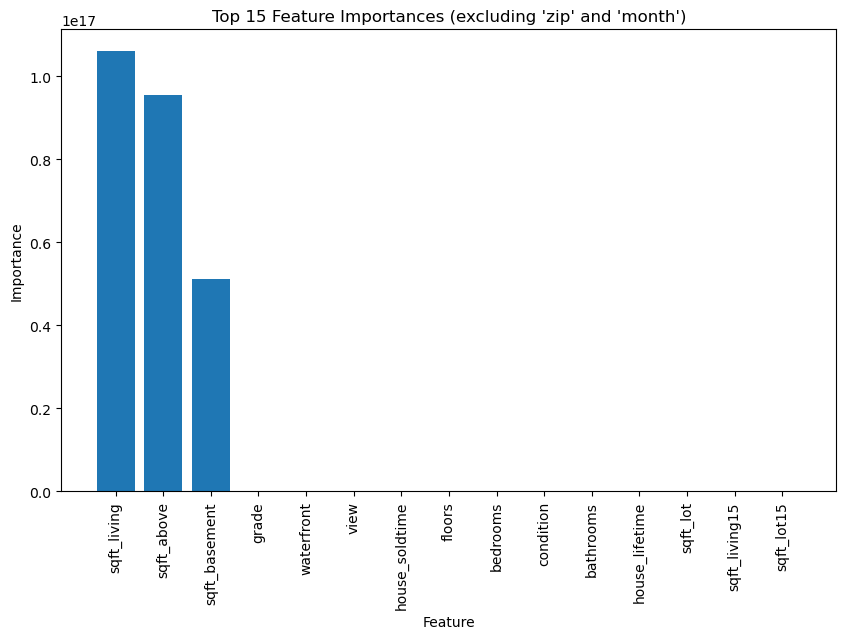

In [20]:
# Select the columns you want to use

# Fit a linear regression model to the data
model = LinearRegression()

model.fit(X_scaled, y)


# Get the feature importances for all columns
importances = np.abs(model.coef_)

# Create a boolean mask to select columns that do not start with 'zip' or 'month'
exclude_mask = ~X.columns.str.startswith(('zip', 'month'))

# Apply the mask to get the names and importances of the selected columns
selected_names = X.columns[exclude_mask]
selected_importances = importances[exclude_mask]

# Sort the selected features by importance
indices = np.argsort(selected_importances)[::-1]

# Limit to the top 15 features
top_indices = indices[:15]
top_importances = selected_importances[top_indices]
top_feature_names = selected_names[top_indices]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(15), top_importances)
plt.xticks(range(15), top_feature_names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 15 Feature Importances (excluding 'zip' and 'month')")
plt.show()


## Standard Scaler Results

In [21]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42) 

In [22]:

# make predictions using your model
y_pred = model.predict(X_test)

# calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# calculate R^2 score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Absolute Error: 95721.33759756832
Mean Squared Error: 26518869690.670998
R^2 Score: 0.8000062104333513


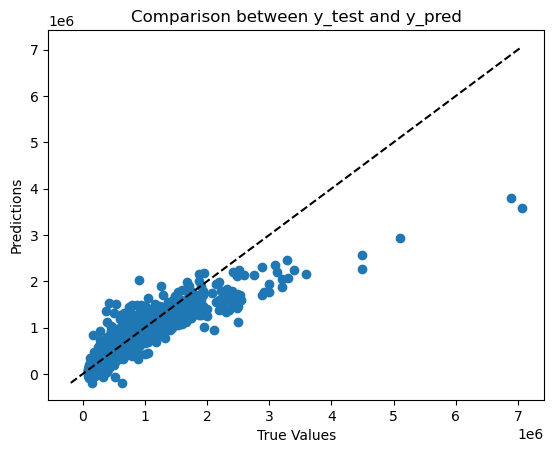

In [23]:
# plot the data
plt.scatter(y_test, y_pred)

# add labels and title
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Comparison between y_test and y_pred')

# add a line representing perfect prediction
min_val = min(np.min(y_test), np.min(y_pred))
max_val = max(np.max(y_test), np.max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'k--')

# show the plot
plt.show()

## How can we improve this??

Testinf KNN

In [24]:
scores = []
scores2 = []# We will store here the R2 values for each of our K-NN models with different K-values.
for i in range(2,20): 
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model2 = KNeighborsRegressor(n_neighbors=i, weights='distance')
    knn_model.fit(X_train, y_train)
    knn_model2.fit(X_train, y_train)
    scores.append(knn_model.score(X_test, y_test))
    scores2.append(knn_model2.score(X_test, y_test))

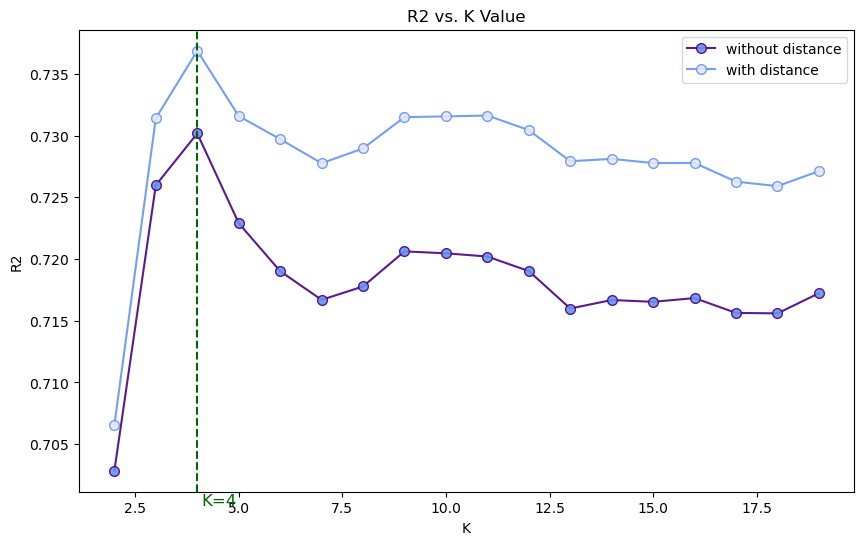

In [25]:
plt.figure(figsize=(10,6))
plt.plot(range(2,20), scores, color = 'indigo', linestyle='-',
         marker='o', markerfacecolor='cornflowerblue', markersize=7, label='without distance', alpha=0.9)
plt.plot(range(2,20), scores2, color = 'cornflowerblue', linestyle='-',
         marker='o', markerfacecolor='lavender', markersize=7, label='with distance', alpha=0.9)
#Add vertical line in k=17
plt.axvline(x=4, color='darkgreen', linestyle='dashed')
# Add text to the vertical line
plt.text(4.1, 0.7, "K=4", color='darkgreen', fontsize=12)

plt.title('R2 vs. K Value')
plt.xlabel('K')
plt.ylabel('R2')
plt.legend()
plt.show()

k=9 is the best argument for KNN

In [26]:
def testing(models_list):
    for i in models_list:
        model = i
        model.fit(X_train,y_train)
        predictions=model.predict(X_test)
        MAE = mean_absolute_error(y_test,predictions)
        MSE = mean_squared_error(y_test,predictions)
        RMSE = np.sqrt(MSE)
        R2 = r2_score(y_test,predictions)
        R2_adj = 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
        print("-------------------------")
        print('\033[1m' + "Using the model: " + str(model) + '\033[0m')
        print("The mean absolute error is: %6.3f" % (MAE))
        print("The mean squared error is: %6.3f" % (MSE))
        print("The root mean squared error is: %6.3f" % (RMSE))
        print("The R2 is: %6.3f" % (R2))
        print("The Adjusted R2 is: %6.3f" % (R2_adj))

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

models=[
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=4, weights = "distance"),
    MLPRegressor(hidden_layer_sizes=(5, 5, 5), activation='relu', solver='adam', max_iter=1000),
    MLPRegressor(hidden_layer_sizes=(10, 5), activation='relu', solver='adam', max_iter=1000),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

In [28]:
testing(models)

-------------------------
Using the model: LinearRegression()
The mean absolute error is: 96233.455
The mean squared error is: 27002164177.120
The root mean squared error is: 164323.353
The R2 is:  0.796
The Adjusted R2 is:  0.793
-------------------------
Using the model: KNeighborsRegressor(n_neighbors=4, weights='distance')
The mean absolute error is: 99534.195
The mean squared error is: 34888100507.166
The root mean squared error is: 186783.566
The R2 is:  0.737
The Adjusted R2 is:  0.733
-------------------------
Using the model: MLPRegressor(hidden_layer_sizes=(5, 5, 5), max_iter=1000)
The mean absolute error is: 77319.401
The mean squared error is: 17324048248.494
The root mean squared error is: 131620.850
The R2 is:  0.869
The Adjusted R2 is:  0.867
-------------------------
Using the model: MLPRegressor(hidden_layer_sizes=(10, 5), max_iter=1000)
The mean absolute error is: 86563.168
The mean squared error is: 20974065620.556
The root mean squared error is: 144824.258
The R2 is